# ARIMA Forecasting
## Forecasting Dividends for Each Company
The code below will go through each csv file (with each file containing dividends for each company) and fit an ARIMA model.

First, the dividends are loaded into a Pandas DataFrame. Then, since the data is not stationary, the first difference is calculated. This for the most part makes the dividends data for all of the companys stationary.

Next, the data is split, with the first 70% being training data and the other 30% being test data which will be used for testing the accuracy of the forecasts the model predicts.

For each company, the MSE is printed and a graph is produced that shows both the predicted dividends from the model and the actual dividends.

For simplicity, the order of each ARIMA model is 1, 1, 1. 

In [1]:
import os
import warnings
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

In [2]:
dividend_files = os.listdir('../data/series/good')

In [3]:
warnings.filterwarnings('ignore')

Testing Mean Squared Error - 0.00001


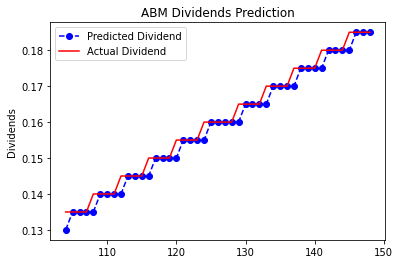

Testing Mean Squared Error - 0.00049


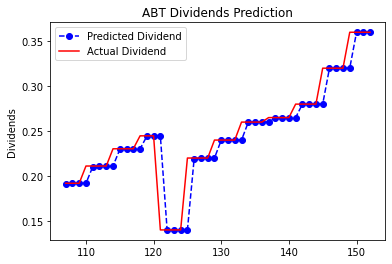

Testing Mean Squared Error - 0.00048


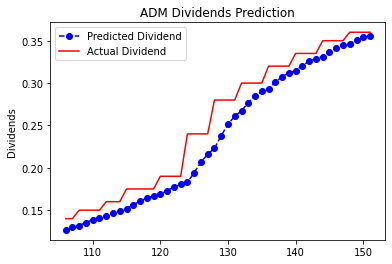

Testing Mean Squared Error - 0.00096


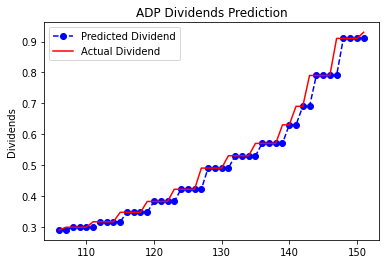

Testing Mean Squared Error - 0.00005


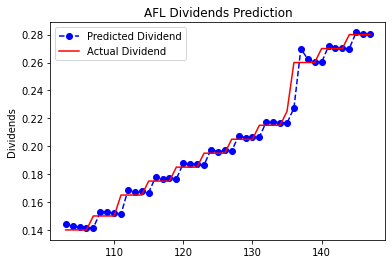

Testing Mean Squared Error - 0.00024


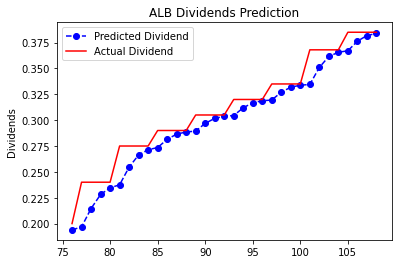

Testing Mean Squared Error - 0.00014


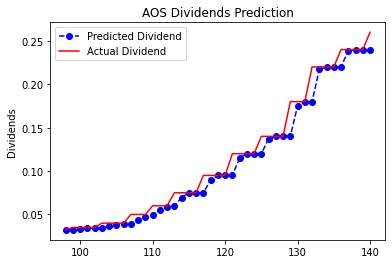

Testing Mean Squared Error - 0.00181


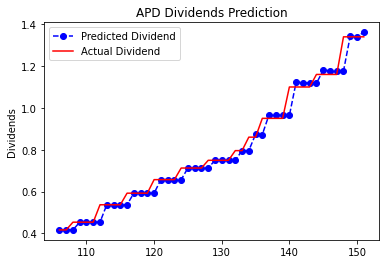

Testing Mean Squared Error - 0.00001


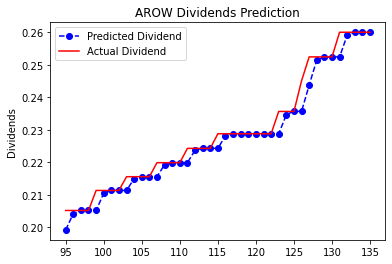

Testing Mean Squared Error - 0.00002


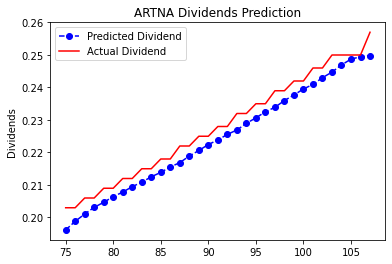

Testing Mean Squared Error - 0.00027


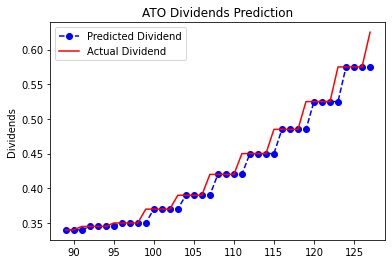

Testing Mean Squared Error - 0.00010


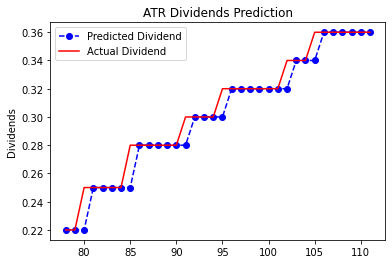

Testing Mean Squared Error - 0.00012


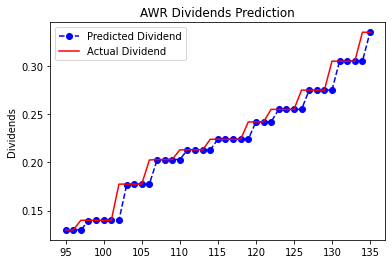

Testing Mean Squared Error - 0.00028


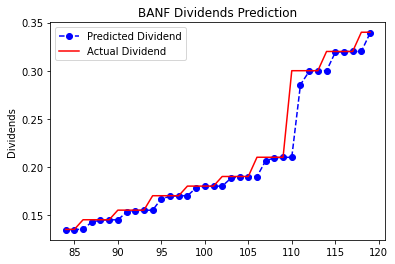

Testing Mean Squared Error - 0.00046


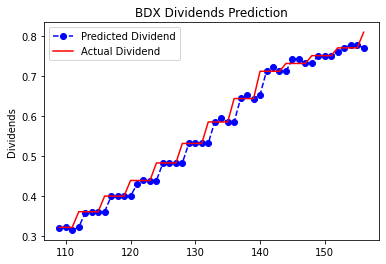

Testing Mean Squared Error - 0.24832


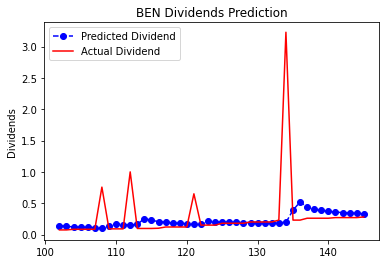

Testing Mean Squared Error - 0.00012


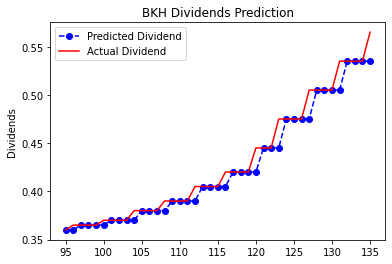

Testing Mean Squared Error - 0.00004


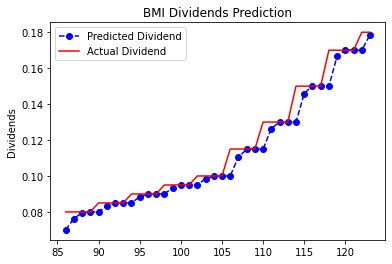

Testing Mean Squared Error - 0.00246


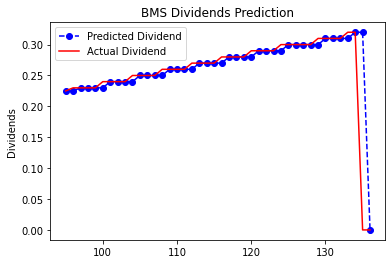

Testing Mean Squared Error - 0.00000


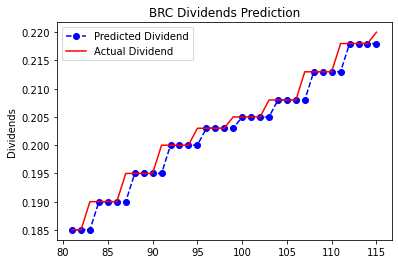

Testing Mean Squared Error - 0.00001


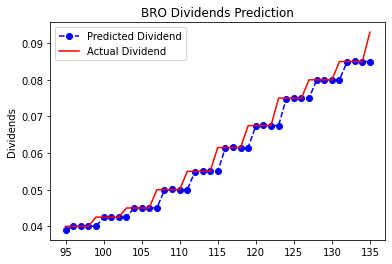

Testing Mean Squared Error - 0.00120


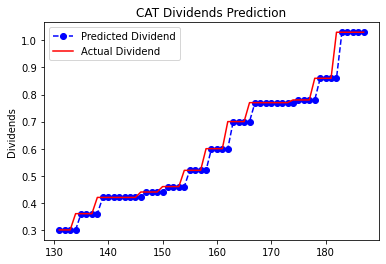

Testing Mean Squared Error - 0.06072


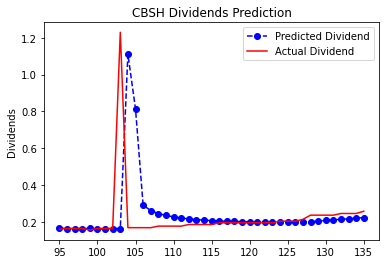

Testing Mean Squared Error - 0.00200


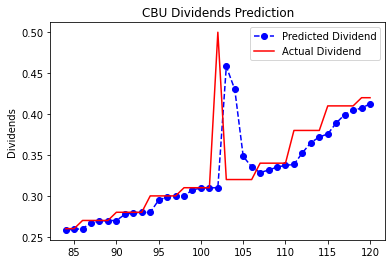

Testing Mean Squared Error - 0.00048


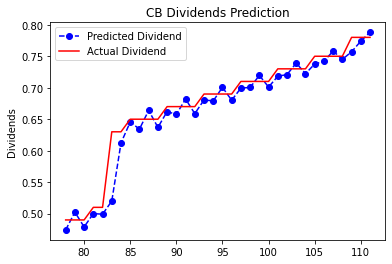

Testing Mean Squared Error - 0.00041


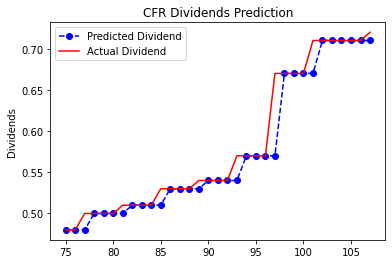

Testing Mean Squared Error - 0.00009


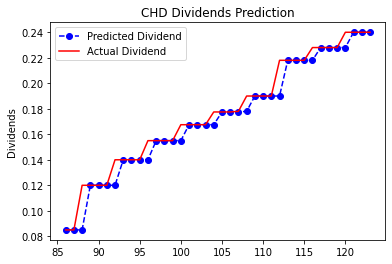

Testing Mean Squared Error - 0.00014


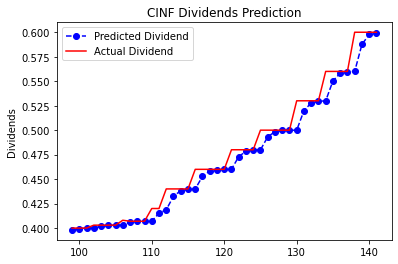

Testing Mean Squared Error - 0.00094


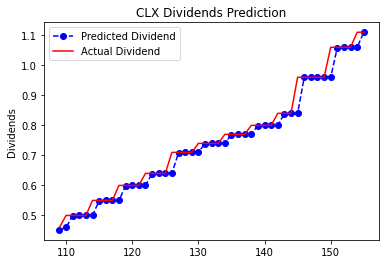

Testing Mean Squared Error - 0.00012


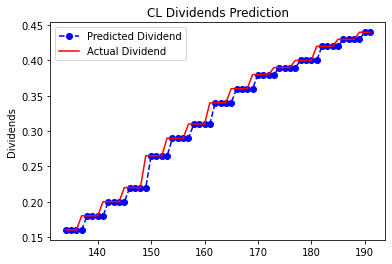

Testing Mean Squared Error - 0.00041


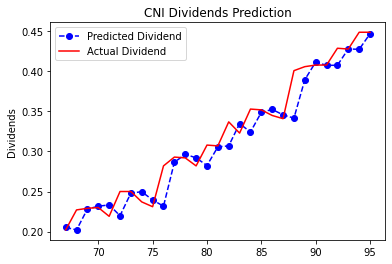

Testing Mean Squared Error - 0.00001


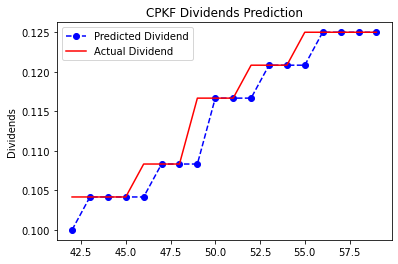

Testing Mean Squared Error - 0.00046


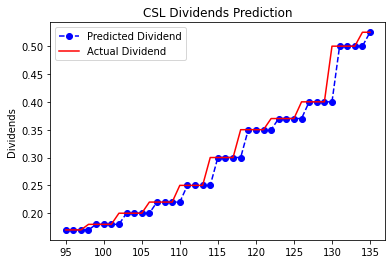

Testing Mean Squared Error - 0.02573


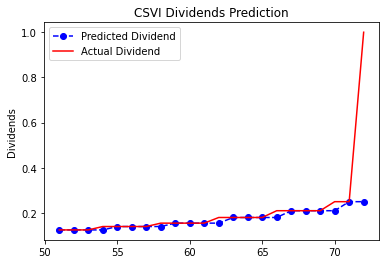

Testing Mean Squared Error - 0.06917


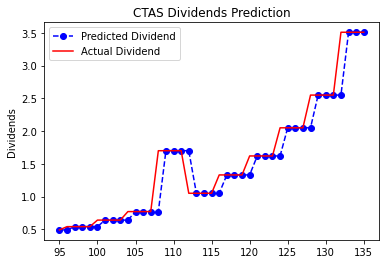

Testing Mean Squared Error - 0.00005


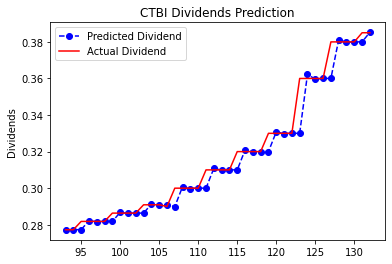

Testing Mean Squared Error - 0.00094


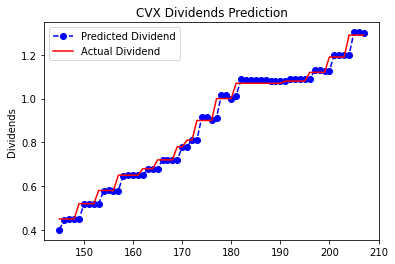

Testing Mean Squared Error - 0.00003


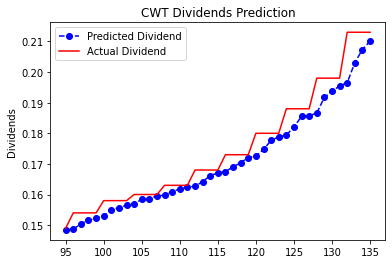

Testing Mean Squared Error - 0.00104


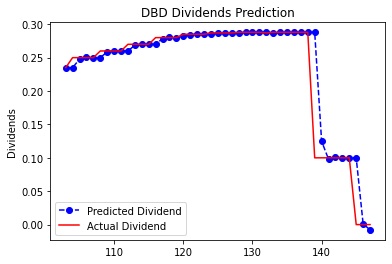

Testing Mean Squared Error - 0.00007


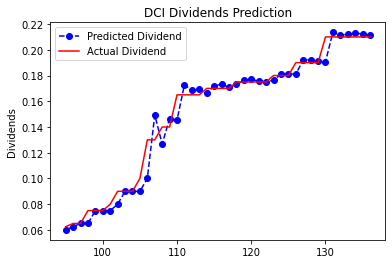

Testing Mean Squared Error - 0.00030


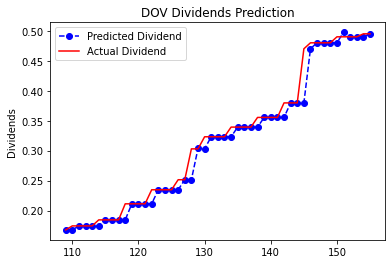

Testing Mean Squared Error - 0.00003


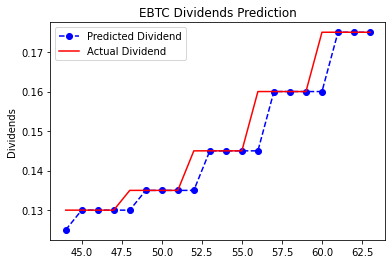

Testing Mean Squared Error - 0.00029


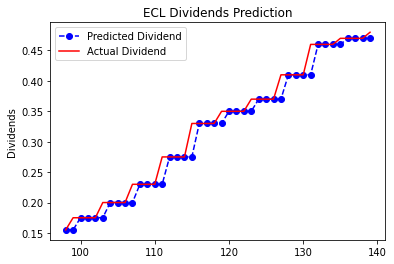

Testing Mean Squared Error - 0.00007


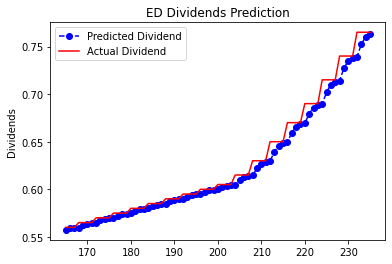

Testing Mean Squared Error - 0.00003


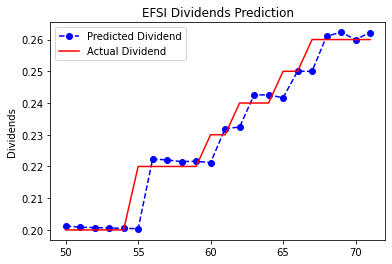

Testing Mean Squared Error - 0.00045


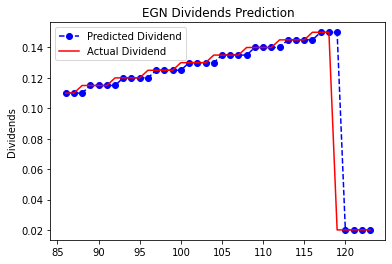

Testing Mean Squared Error - 0.00016


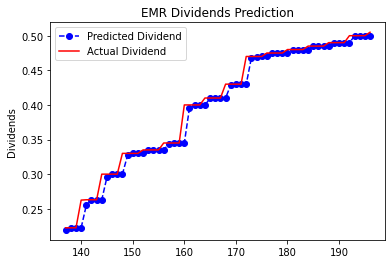

Testing Mean Squared Error - 0.01503


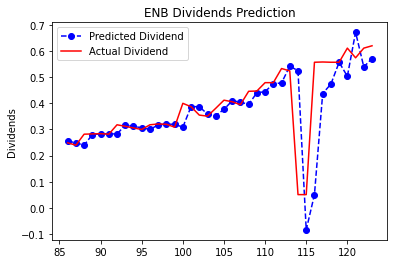

Testing Mean Squared Error - 0.10191


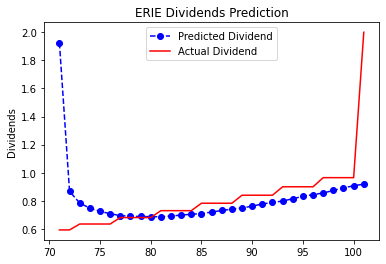

Testing Mean Squared Error - 0.00389


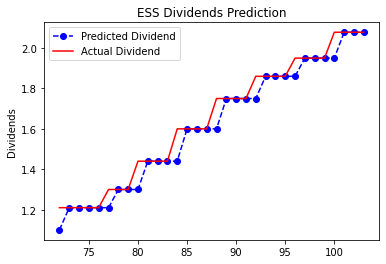

Testing Mean Squared Error - 0.00024


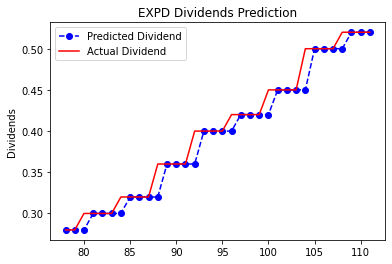

Testing Mean Squared Error - 0.00168


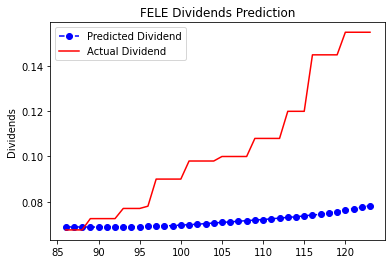

Testing Mean Squared Error - 0.00004


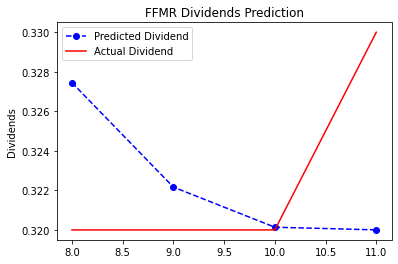

Testing Mean Squared Error - 0.00003


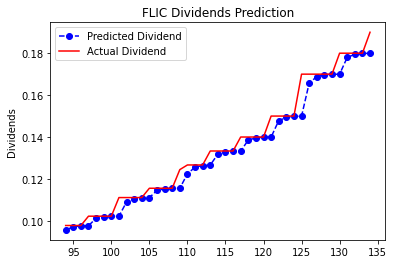

Testing Mean Squared Error - 0.02914


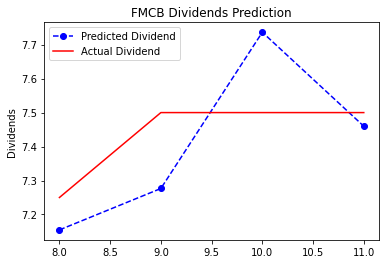

Testing Mean Squared Error - 0.00120


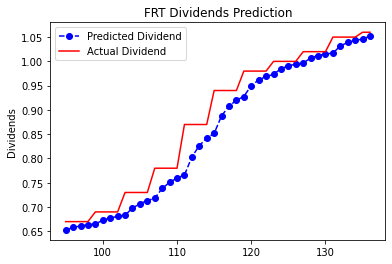

Testing Mean Squared Error - 0.00003


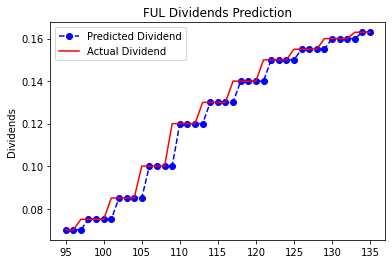

Testing Mean Squared Error - 0.00172


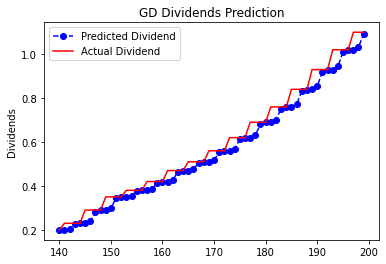

Testing Mean Squared Error - 0.00030


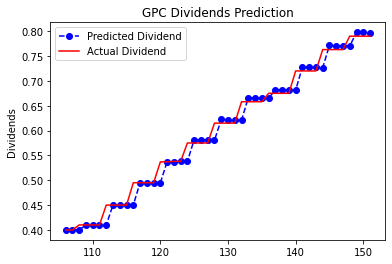

Testing Mean Squared Error - 0.23223


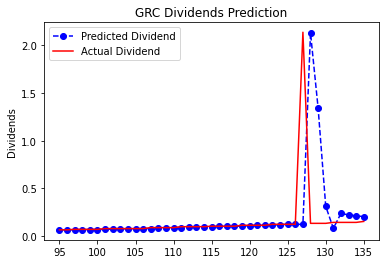

Testing Mean Squared Error - 0.00261


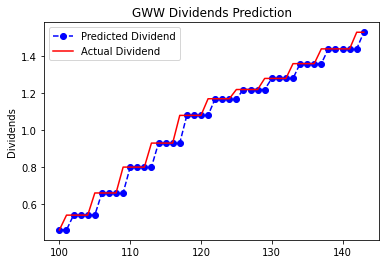

Testing Mean Squared Error - 0.06507


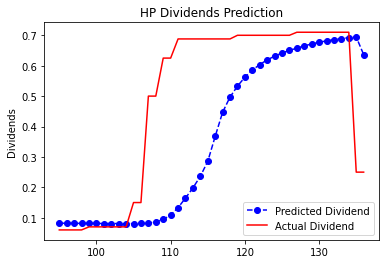

Testing Mean Squared Error - 0.00009


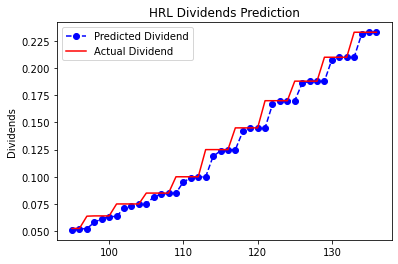

Testing Mean Squared Error - 0.00210


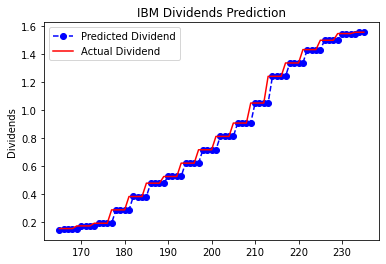

Testing Mean Squared Error - 0.00250


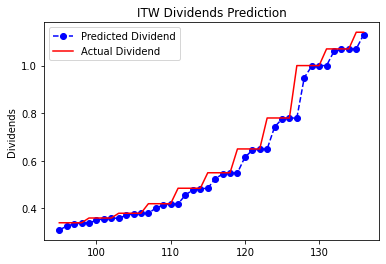

Testing Mean Squared Error - 0.00051


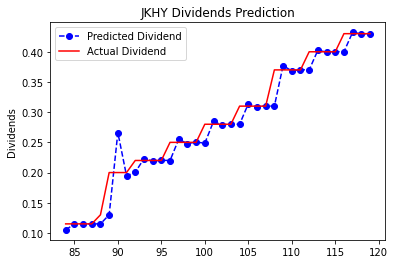

Testing Mean Squared Error - 0.00043


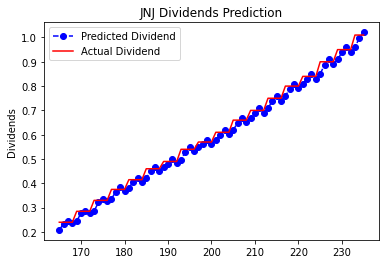

Testing Mean Squared Error - 0.00124


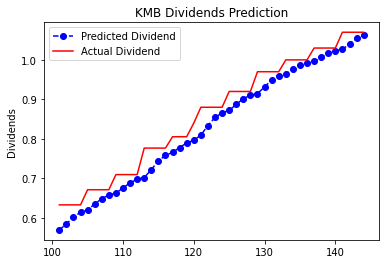

Testing Mean Squared Error - 0.00008


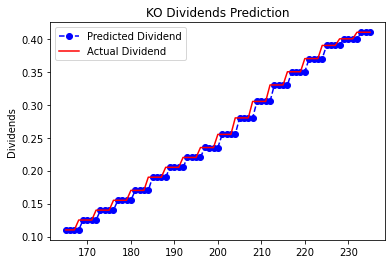

Testing Mean Squared Error - 1.26024


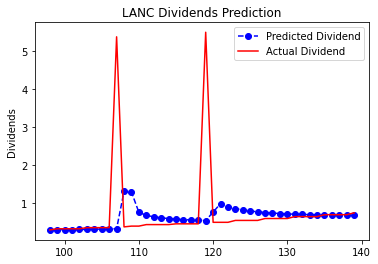

Testing Mean Squared Error - 0.00047


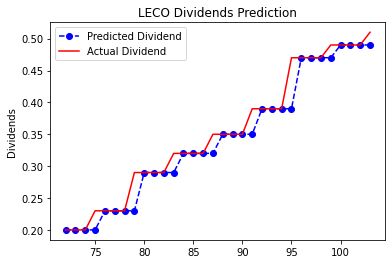

Testing Mean Squared Error - 0.00004


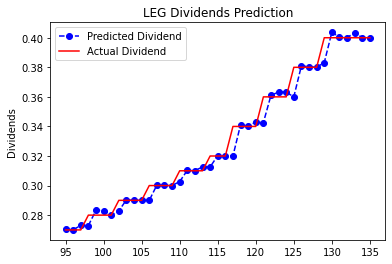

Testing Mean Squared Error - 0.00067


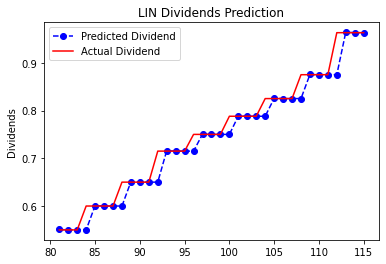

Testing Mean Squared Error - 0.00067


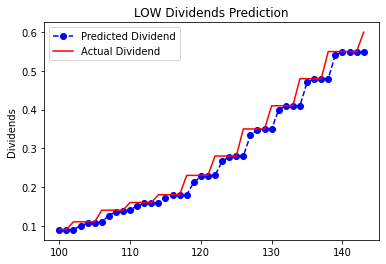

Testing Mean Squared Error - 0.00006


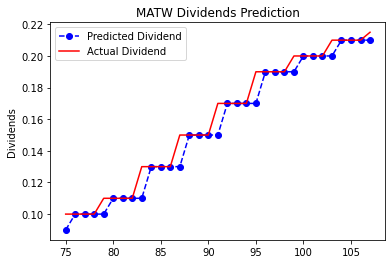

Testing Mean Squared Error - 0.03056


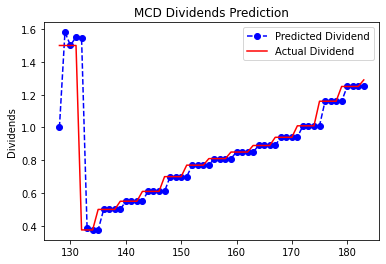

Testing Mean Squared Error - 0.00000


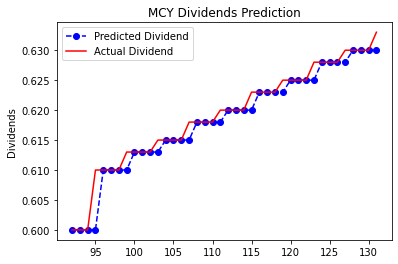

Testing Mean Squared Error - 0.00035


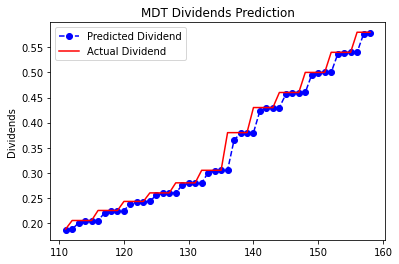

Testing Mean Squared Error - 0.00001


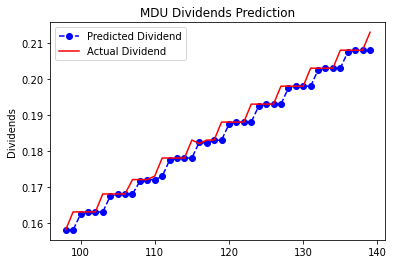

Testing Mean Squared Error - 0.00004


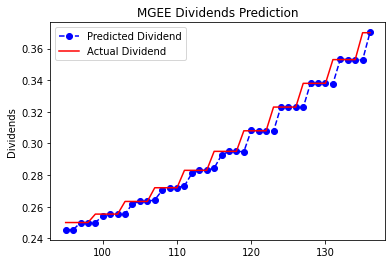

Testing Mean Squared Error - 0.00026


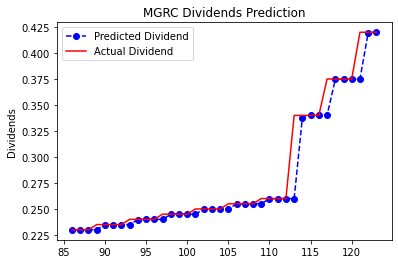

Testing Mean Squared Error - 0.00010


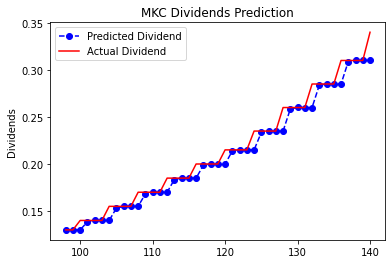

Testing Mean Squared Error - 0.00553


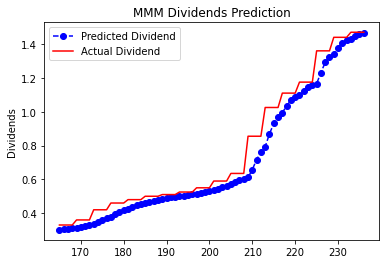

Testing Mean Squared Error - 53.21571


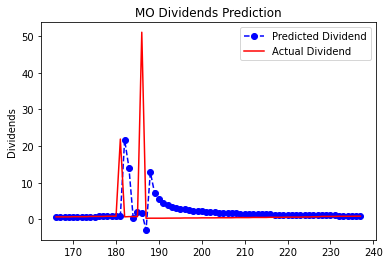

Testing Mean Squared Error - 0.00138


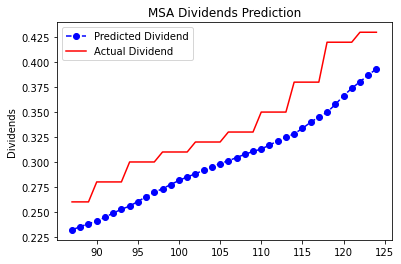

Testing Mean Squared Error - 0.00004


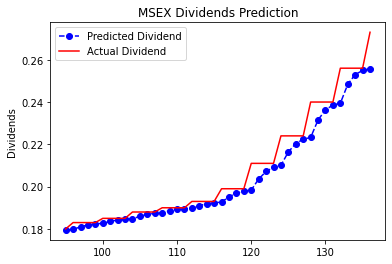

Testing Mean Squared Error - 0.03594


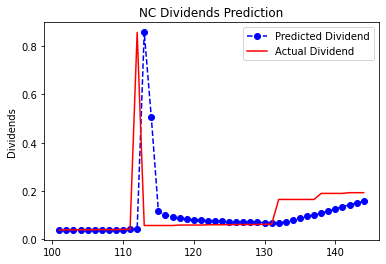

Testing Mean Squared Error - 0.00022


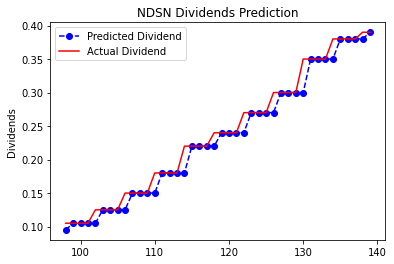

Testing Mean Squared Error - 0.00013


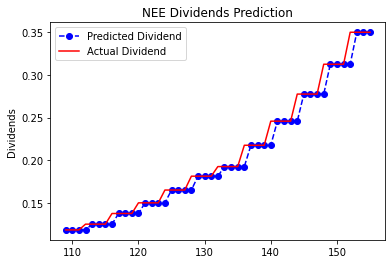

Testing Mean Squared Error - 0.00003


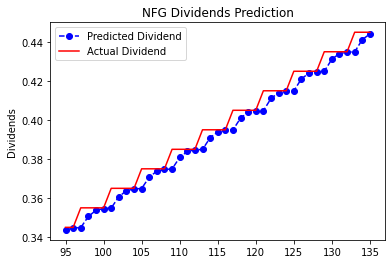

Testing Mean Squared Error - 0.04738


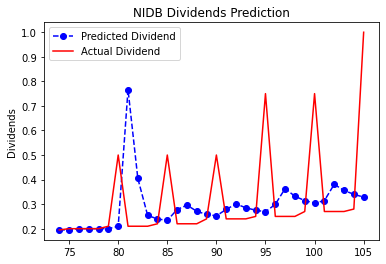

Testing Mean Squared Error - 0.00007


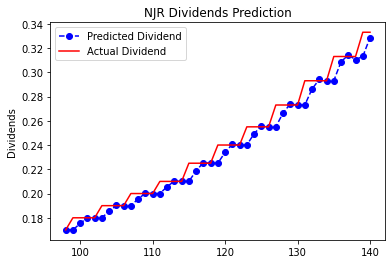

Testing Mean Squared Error - 0.00006


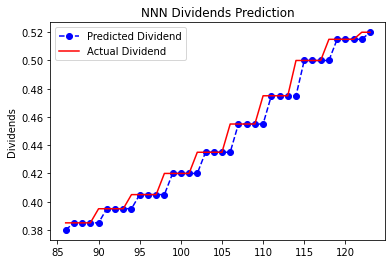

Testing Mean Squared Error - 0.00002


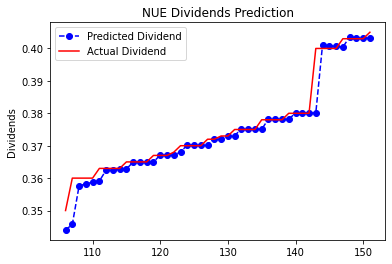

Testing Mean Squared Error - 0.00005


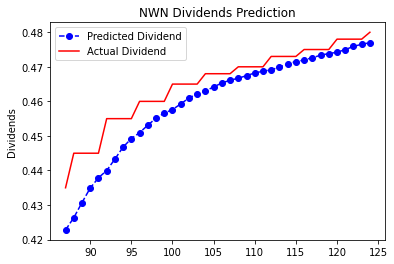

Testing Mean Squared Error - 0.04002


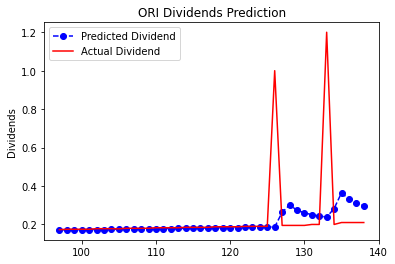

Testing Mean Squared Error - 0.00000


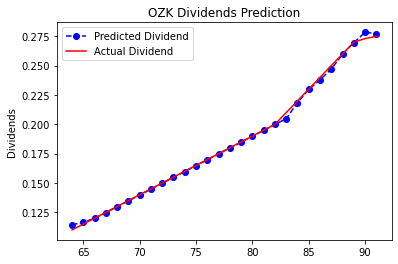

Testing Mean Squared Error - 0.00003


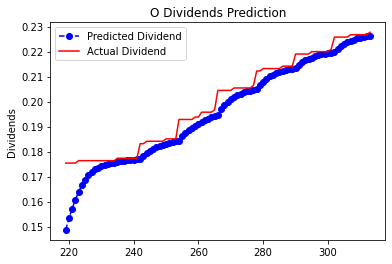

Testing Mean Squared Error - 0.00000


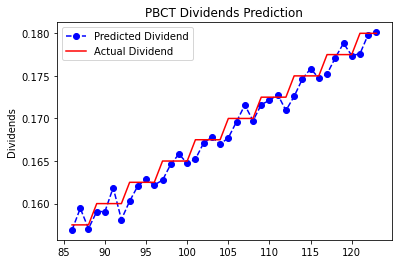

Testing Mean Squared Error - 0.00199


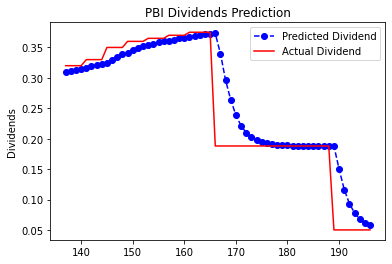

Testing Mean Squared Error - 0.01276


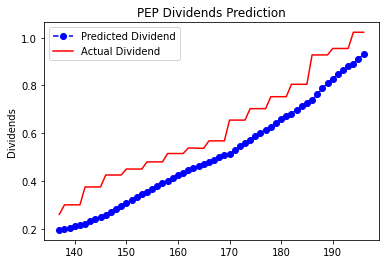

Testing Mean Squared Error - 0.00040


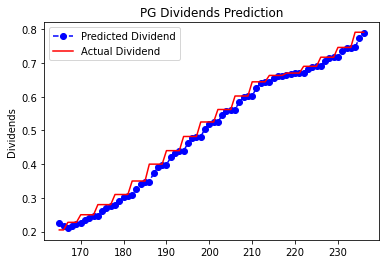

Testing Mean Squared Error - 0.00120


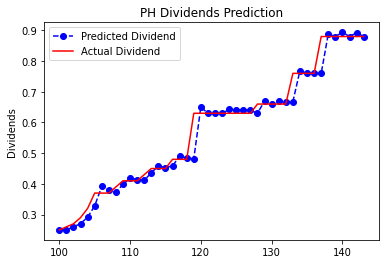

Testing Mean Squared Error - 0.00151


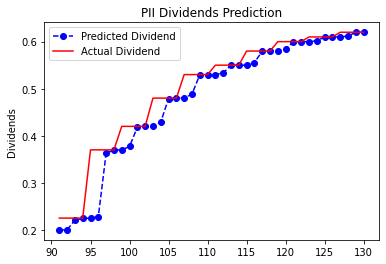

Testing Mean Squared Error - 0.00015


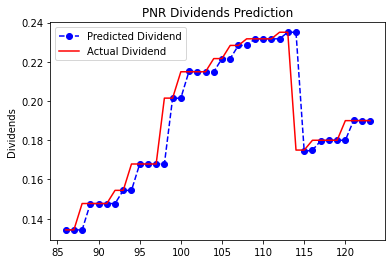

Testing Mean Squared Error - 0.00019


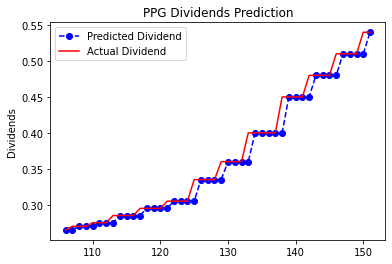

Testing Mean Squared Error - 0.00005


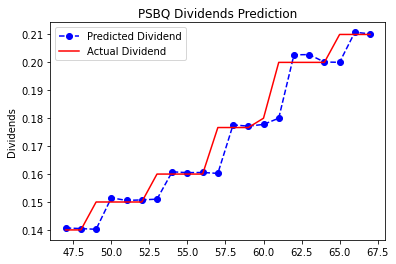

Testing Mean Squared Error - 1.46995


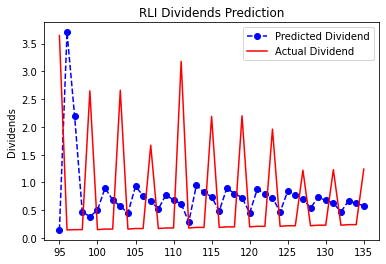

Testing Mean Squared Error - 0.00002


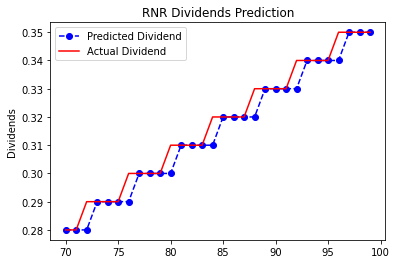

Testing Mean Squared Error - 0.00053


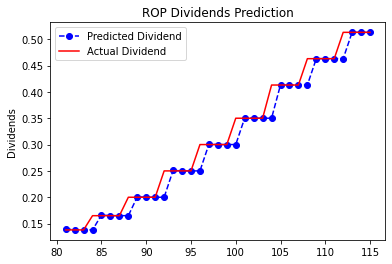

Testing Mean Squared Error - 0.00444


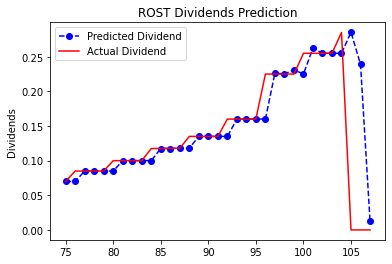

Testing Mean Squared Error - 0.00008


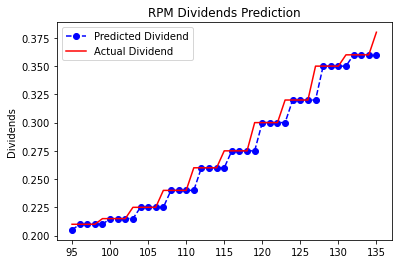

Testing Mean Squared Error - 0.00018


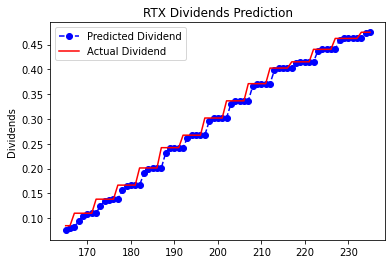

Testing Mean Squared Error - 0.00116


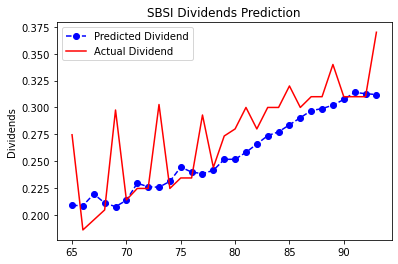

Testing Mean Squared Error - 0.00009


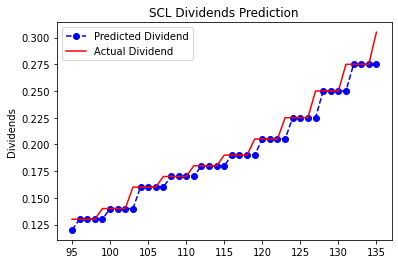

Testing Mean Squared Error - 0.00507


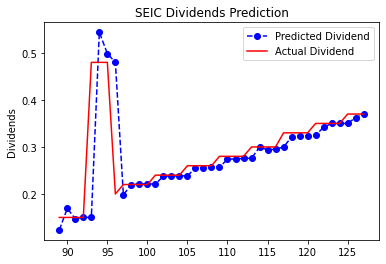

Testing Mean Squared Error - 0.00044


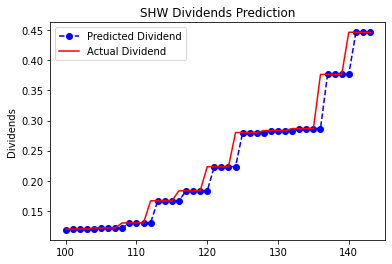

Testing Mean Squared Error - 0.00062


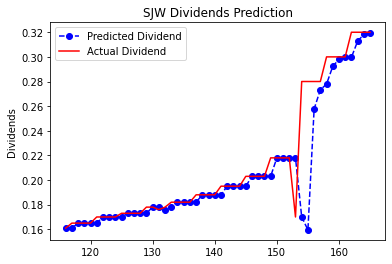

Testing Mean Squared Error - 0.00535


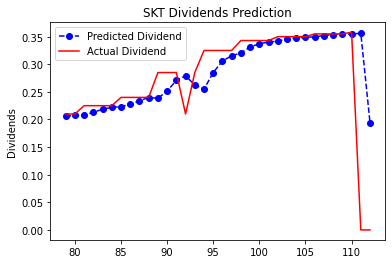

Testing Mean Squared Error - 0.00008


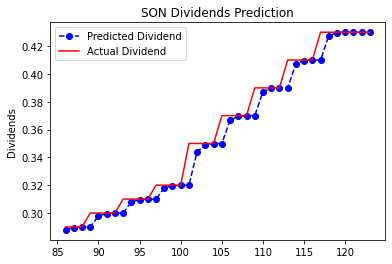

Testing Mean Squared Error - 0.23042


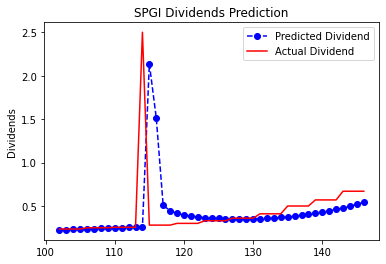

Testing Mean Squared Error - 0.00006


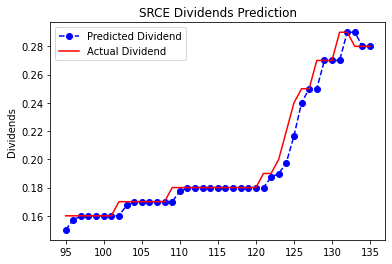

Testing Mean Squared Error - 0.00110


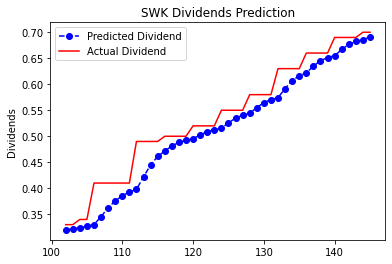

Testing Mean Squared Error - 0.00055


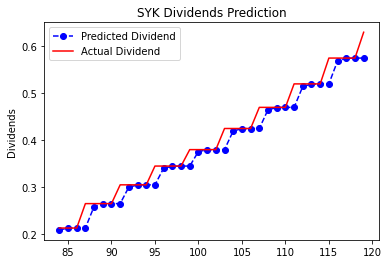

Testing Mean Squared Error - 0.00015


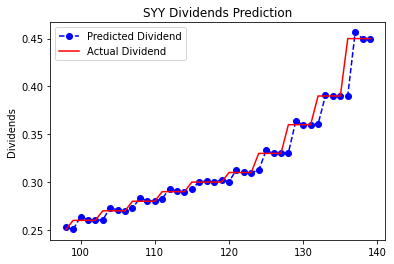

Testing Mean Squared Error - 0.00002


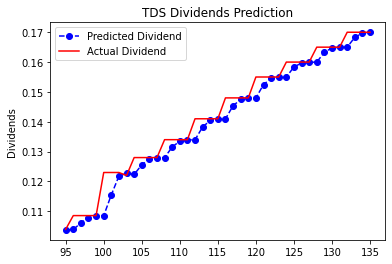

Testing Mean Squared Error - 0.00066


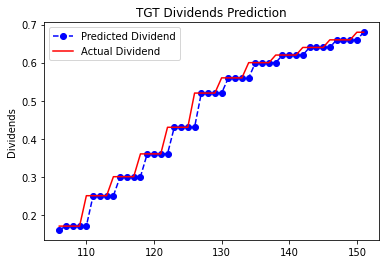

Testing Mean Squared Error - 0.05692


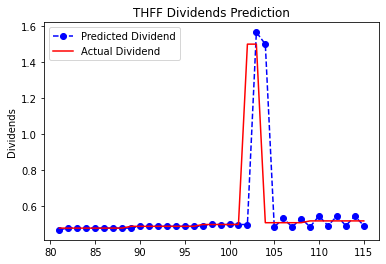

Testing Mean Squared Error - 0.00877


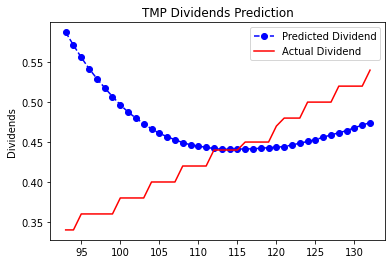

Testing Mean Squared Error - 0.00004


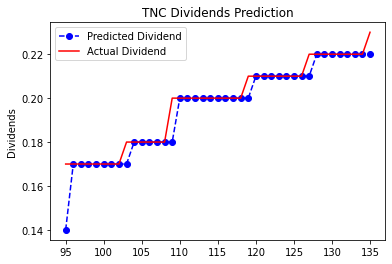

Testing Mean Squared Error - 0.00008


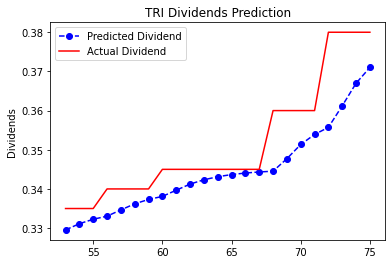

Testing Mean Squared Error - 0.09674


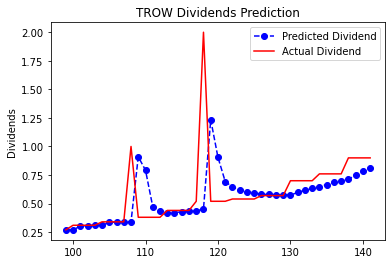

Testing Mean Squared Error - 0.00419


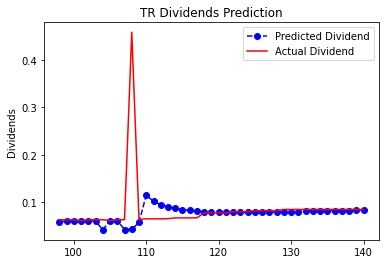

Testing Mean Squared Error - 0.09760


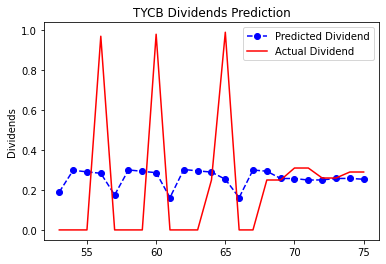

Testing Mean Squared Error - 0.00001


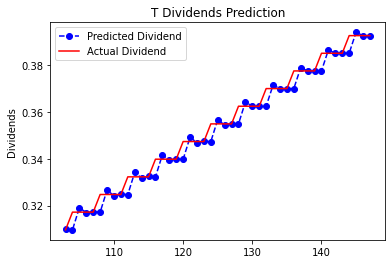

Testing Mean Squared Error - 0.00462


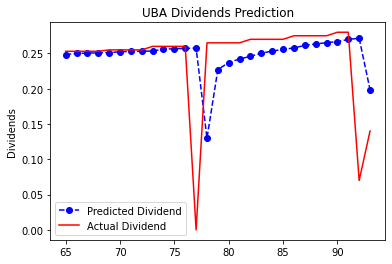

Testing Mean Squared Error - 0.00001


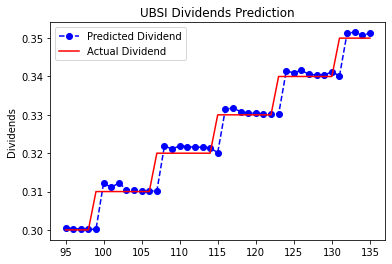

Testing Mean Squared Error - 0.00010


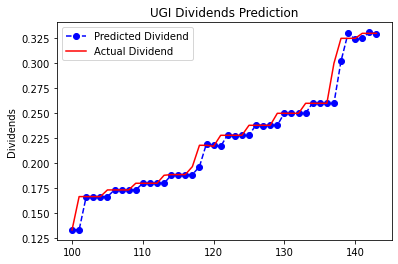

Testing Mean Squared Error - 0.00001


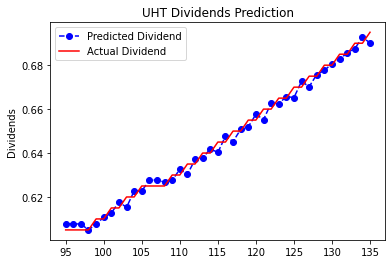

Testing Mean Squared Error - 0.00009


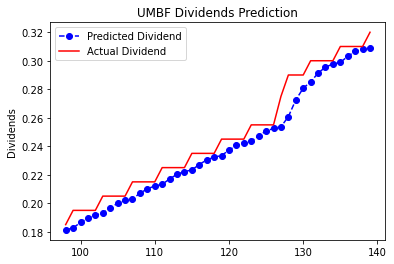

Testing Mean Squared Error - 0.00098


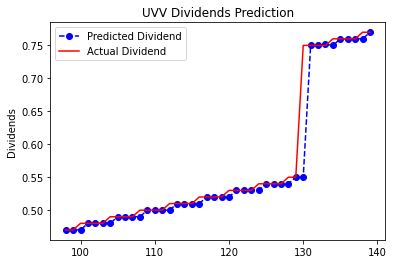

Testing Mean Squared Error - 0.00057


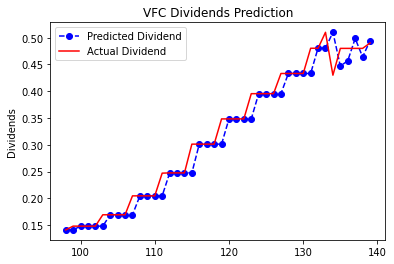

Testing Mean Squared Error - 0.00001


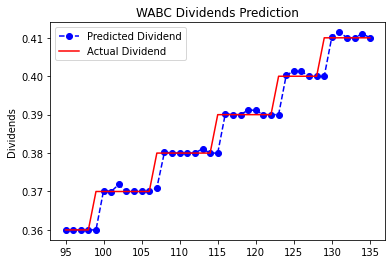

Testing Mean Squared Error - 0.00027


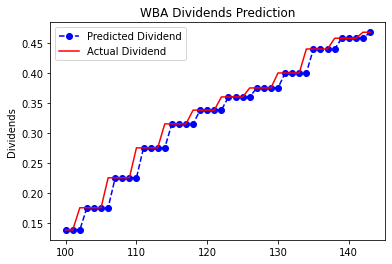

Testing Mean Squared Error - 0.00002


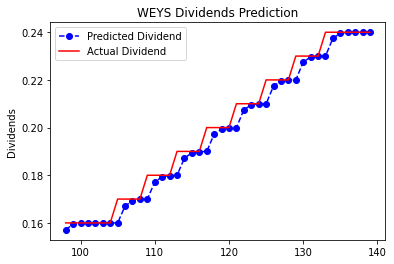

Testing Mean Squared Error - 0.00654


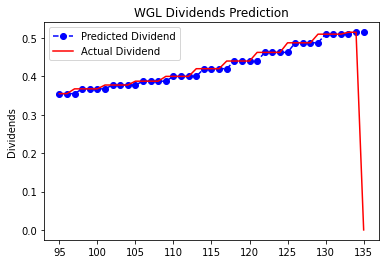

Testing Mean Squared Error - 0.00028


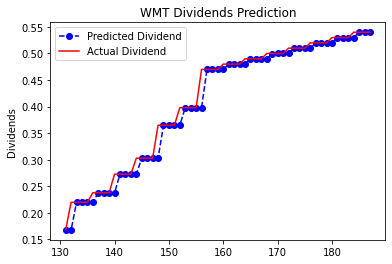

Testing Mean Squared Error - 0.00047


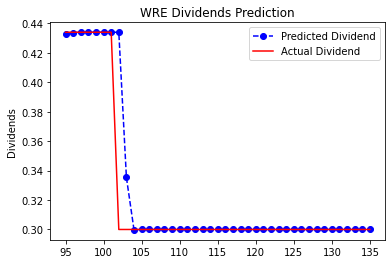

Testing Mean Squared Error - 0.00002


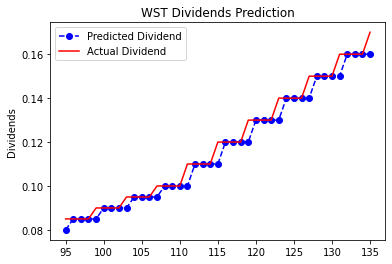

Testing Mean Squared Error - 0.00004


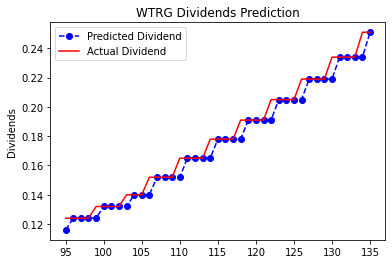

In [4]:
for i in range(1, len(dividend_files) - 1):
    file = dividend_files[i]
    company = file.split('_')[0]
    
    df = pd.read_csv("../data/series/good/" + file)
    df.rename(columns = {'0': 'Dividends'}, inplace = True)
    dividends = df['Dividends']
    diff_dividends = dividends.diff(1).dropna()
    
    # ARIMA
    train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]    # split train and test data
    training_data = train_data['Dividends'].values   
    test_data = test_data['Dividends'].values
    history = [x for x in training_data]    # make list of training data
    model_predictions = []

    for time_point in range(len(test_data)):
        model = ARIMA(history, order=(1, 1, 1))
        model_fit = model.fit(method_kwargs={"warn_convergence": False})    # fit model
        output = model_fit.forecast()    # get out-of-sample forecasts (predictions)
        yhat = output[0]    # get value from array
        model_predictions.append(yhat)    # list of model predictions
        true_test_value = test_data[time_point]    # get true value
        history.append(true_test_value)    # append to history (training data)

    MSE_error = mean_squared_error(test_data, model_predictions)
    print(f'Testing Mean Squared Error - {MSE_error:.5f}')
    
    test_set_range = df[int(len(df)*0.7):].index
    plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Dividend')
    plt.plot(test_set_range, test_data, color='red', label='Actual Dividend')
    plt.title(f'{company} Dividends Prediction')
    #plt.xlabel('Date')
    plt.ylabel('Dividends')
    #plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
    plt.legend()
    plt.show()